In [1]:
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

data = pd.read_csv('data.csv')

In [2]:
print(data.isnull().sum())
print("Performing data cleanup")

data['salary_missing'] = data['salary'].isnull().astype(int)

data['currency'] = data['salary'].str.extract(r'([A-Za-z]+)')

unique_currencies = data['currency'].dropna().unique()
print(unique_currencies)

data['salary'] = data['salary'].astype(str)
print(data[data['currency'] == 'KZT']['salary'].head(10))
# When dealing with range salary like 500 000 - 600 000 KZT
# Extract the max and min values
data['min_salary_extracted'] = data['salary'].str.extract(r'(\d+(?:\s\d+)*)[^\d]+')
data['max_salary_extracted'] = data['salary'].str.extract(r'(\d+(?:\s\d+)*)(?=[^\d]*[A-Za-z])')
# Remove spaces and convert to floats
data['min_salary'] = data['min_salary_extracted'].str.replace("\s", "").astype(float)
data['max_salary'] = data['max_salary_extracted'].str.replace("\s", "").astype(float)
print(data[data['currency'] == 'KZT'][['salary', 'max_salary']].head(10))

data['max_salary'].fillna(data['min_salary'], inplace=True)
print(data[data['currency'] == 'KZT'][['salary', 'min_salary', 'max_salary']].head(10))

# calculate the average to get representative salary
data['avg_salary'] = data[['min_salary', 'max_salary']].mean(axis=1)
data['avg_salary'].fillna(data['min_salary'], inplace=True)
print(data[data['currency'] == 'KZT'][['salary', 'min_salary', 'max_salary', 'avg_salary']].head(10))

data['requirements'].fillna('Not Specified', inplace=True)
data['responsibilities'].fillna('Not Specified', inplace=True)

data['schedule'].fillna(-1, inplace=True)

data['publish_date'] = pd.to_datetime(data['publish_date'], format='%d-%m-%Y')

print("Results:", data.isnull().sum())

Unnamed: 0             0
title                  0
salary               986
city                   0
job                    0
publish_date           0
requirements          39
responsibilities      67
schedule            1754
experience             0
employment             0
url                    0
Job                    0
dtype: int64
Performing data cleanup
['KZT' 'RUR' 'USD' 'EUR']
8              700000 KZT
39             100000 KZT
41    150000 - 200000 KZT
42    300000 - 500000 KZT
46    350000 - 500000 KZT
51             300000 KZT
53    300000 - 500000 KZT
60    120000 - 360000 KZT
67             180000 KZT
72    220000 - 300000 KZT
Name: salary, dtype: object
                 salary  max_salary
8            700000 KZT    700000.0
39           100000 KZT    100000.0
41  150000 - 200000 KZT    200000.0
42  300000 - 500000 KZT    500000.0
46  350000 - 500000 KZT    500000.0
51           300000 KZT    300000.0
53  300000 - 500000 KZT    500000.0
60  120000 - 360000 KZT    360000.0


In [3]:
# Summary statistics
numerical_summary = data.describe()
print(numerical_summary)

categorical_summary = data.describe(include="object")
print(categorical_summary)

        Unnamed: 0                   publish_date  schedule  salary_missing  \
count  1754.000000                           1754    1754.0     1754.000000   
mean    876.500000  2023-07-13 21:57:40.433295104      -1.0        0.562144   
min       0.000000            2023-06-24 00:00:00      -1.0        0.000000   
25%     438.250000            2023-07-07 00:00:00      -1.0        0.000000   
50%     876.500000            2023-07-17 00:00:00      -1.0        1.000000   
75%    1314.750000            2023-07-21 00:00:00      -1.0        1.000000   
max    1753.000000            2023-07-24 00:00:00      -1.0        1.000000   
std     506.480503                            NaN       0.0        0.496265   

         min_salary    max_salary    avg_salary  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.985543e+05  4.224119e+05  3.604831e+05  
min    1.000000e+02  2.500000e+02  2.500000e+02  
25%    1.500000e+05  2.175000e+05  2.000000e+05  
50%    2.500000e+05  3.500000e+05  3.0

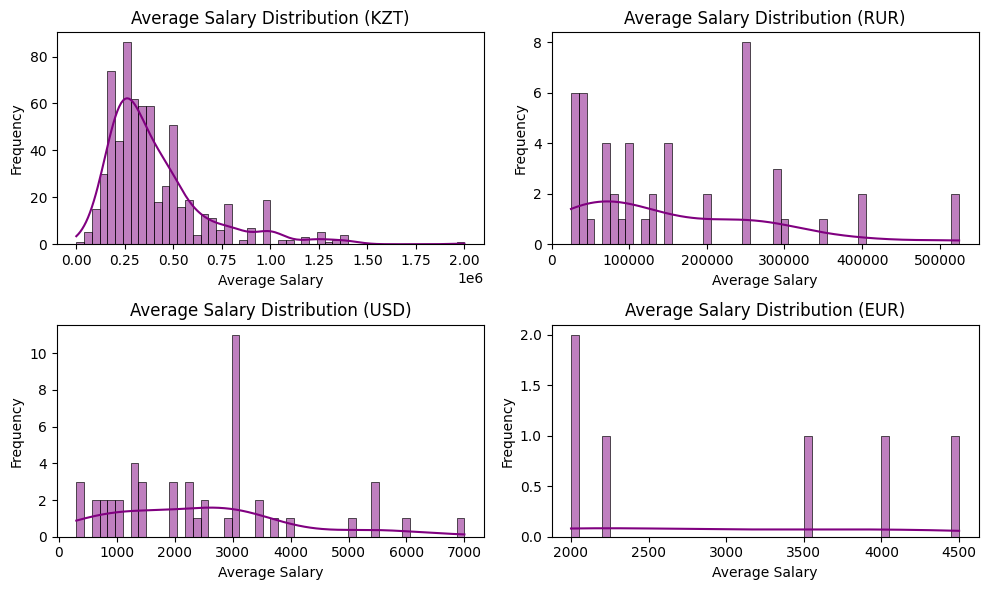

In [4]:
# Boxplot for each currency 'KZT' 'RUR' 'USD' 'EUR'
def plot_salary_distribution(data):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

    for idx, currency in enumerate(unique_currencies):
        row, col = divmod(idx, 2)
        sns.histplot(data[data['currency'] == currency]['avg_salary'], bins=50, kde=True, color='purple', ax=axes[row][col])
        axes[row][col].set_title(f'Average Salary Distribution ({currency})')
        axes[row][col].set_ylabel('Frequency')
        axes[row][col].set_xlabel('Average Salary')
    plt.tight_layout()
    plt.show()

plot_salary_distribution(data)

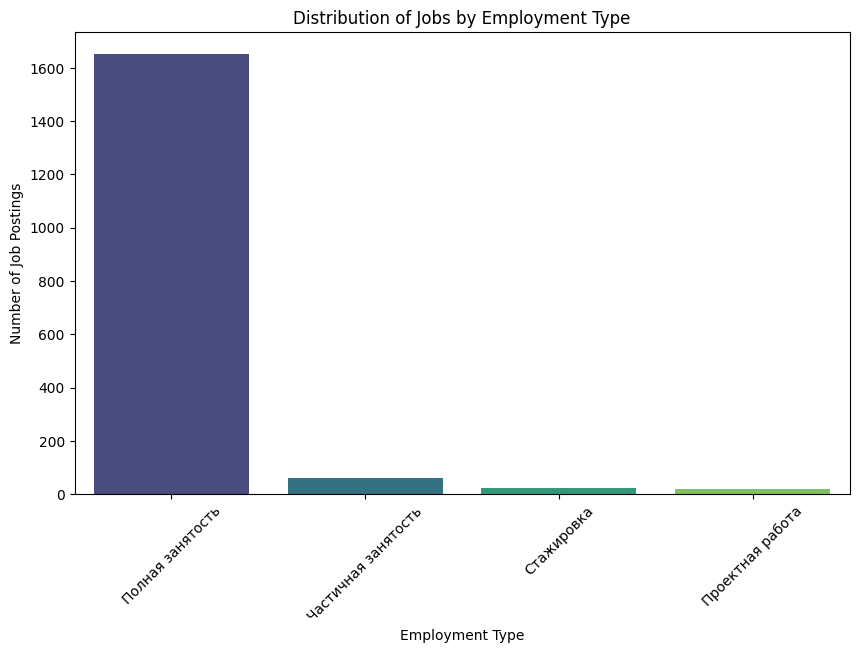

In [5]:
# Bar plot for the distribution of jobs by employment type
def plot_jobs_by_employment(data):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='employment', order=data['employment'].value_counts().index, palette='viridis')
    plt.title('Distribution of Jobs by Employment Type')
    plt.ylabel('Number of Job Postings')
    plt.xlabel('Employment Type')
    plt.xticks(rotation=45)
    plt.show()

plot_jobs_by_employment(data)

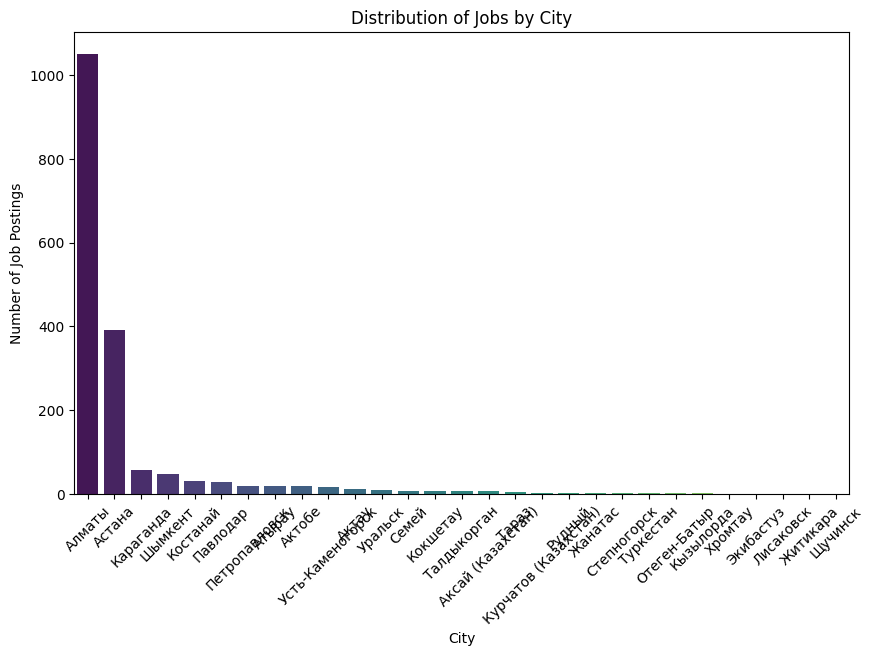

In [6]:
def plot_city_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='city', order=data['city'].value_counts().index, palette='viridis')
    plt.title("Distribution of Jobs by City")
    plt.ylabel('Number of Job Postings')
    plt.xlabel('City')
    plt.xticks(rotation=45)
    plt.show()

plot_city_distribution(data)

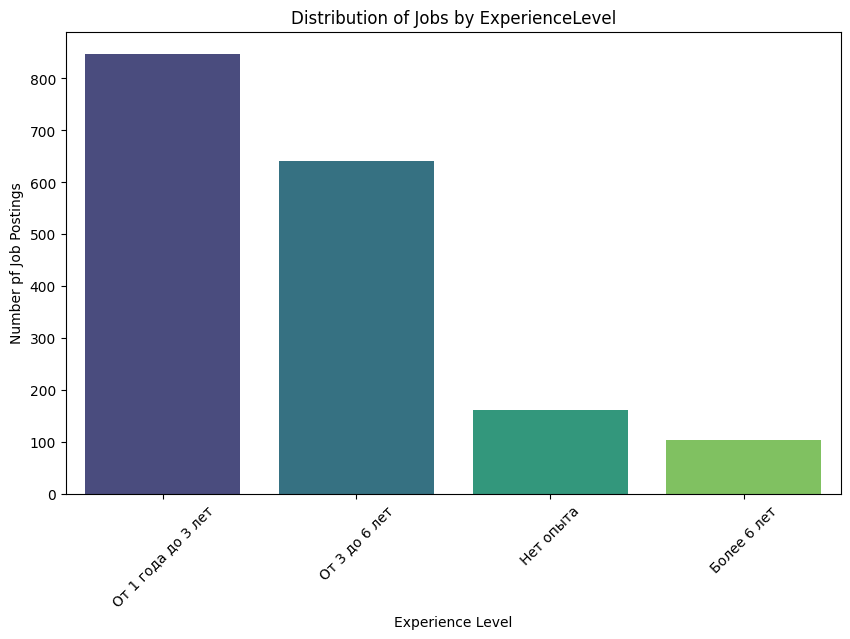

In [7]:
def plot_jobs_by_experience(data):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='experience', order=data['experience'].value_counts().index, palette='viridis')
    plt.title('Distribution of Jobs by ExperienceLevel')
    plt.ylabel('Number pf Job Postings')
    plt.xlabel('Experience Level')
    plt.xticks(rotation=45)
    plt.show()

plot_jobs_by_experience(data)

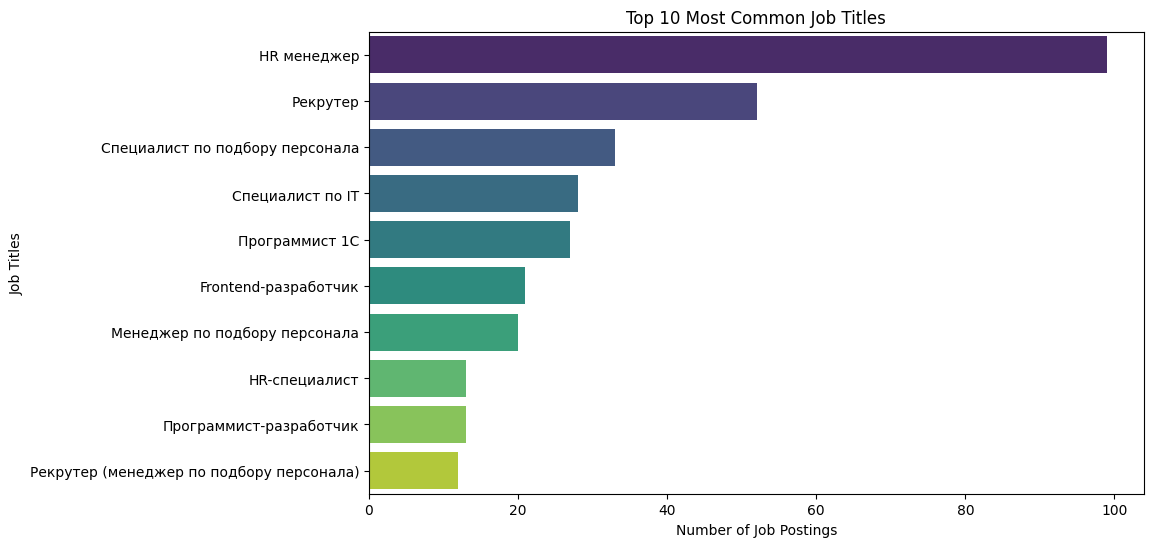

In [8]:
def plot_job_titles_frequency(data, top_n=10):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data['title'], order=data['title'].value_counts().iloc[:top_n].index, palette='viridis')
    plt.title(f'Top {top_n} Most Common Job Titles')
    plt.xlabel('Number of Job Postings')
    plt.ylabel('Job Titles')
    plt.show()


plot_job_titles_frequency(data, top_n=10)

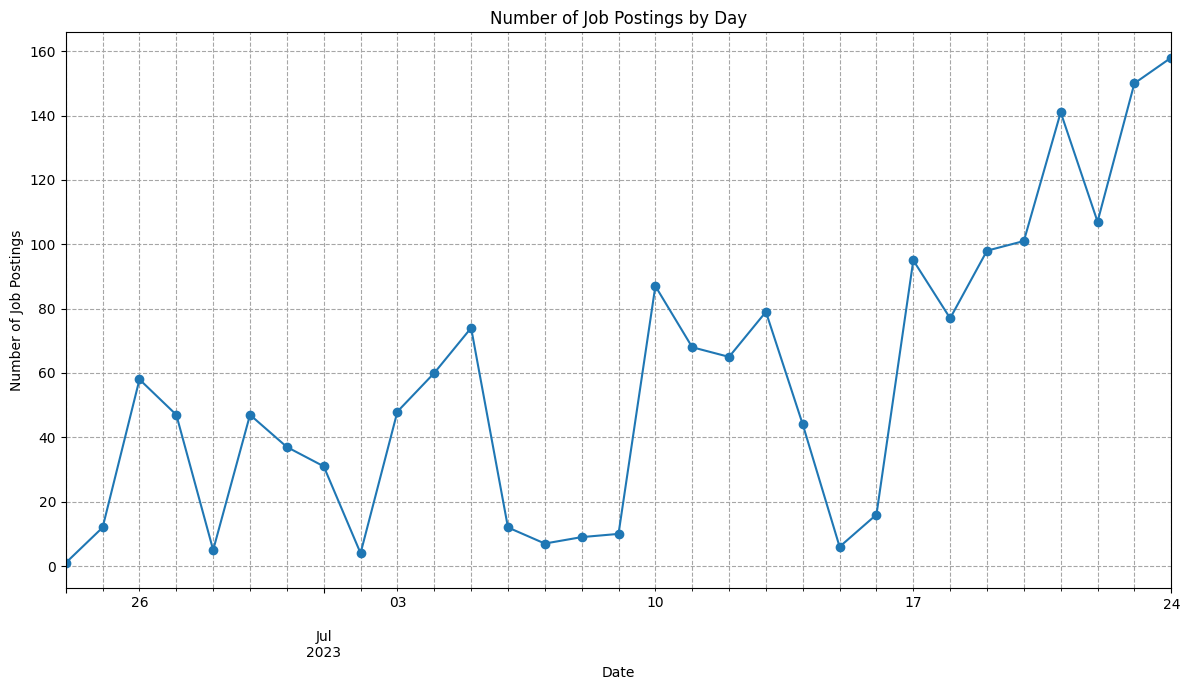

In [9]:
def plot_postings_by_day(data):
    daily_counts = data.groupby('publish_date').size()

    plt.figure(figsize=(12, 7))
    daily_counts.plot(marker='o', linestyle='-')
    plt.title("Number of Job Postings by Day")
    plt.ylabel("Number of Job Postings")
    plt.xlabel("Date")
    plt.grid(True, which="both", ls="--", c='0.65')
    plt.tight_layout()
    plt.show()


plot_postings_by_day(data)

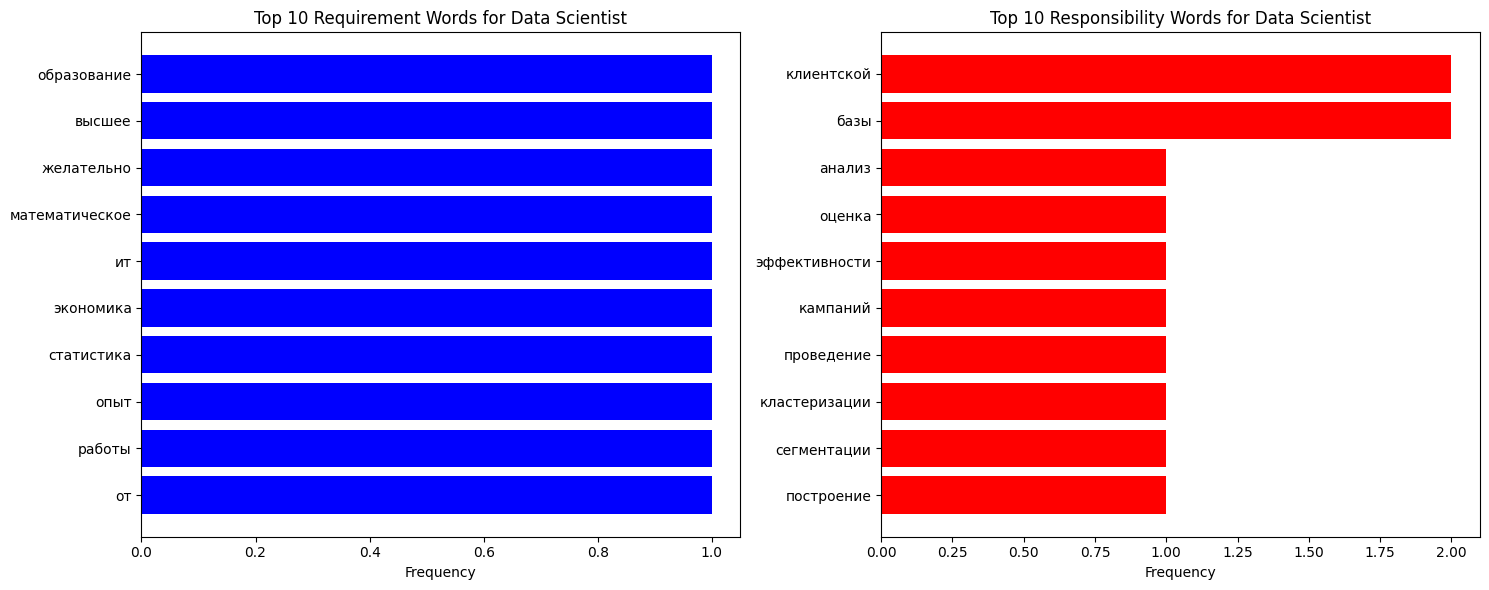

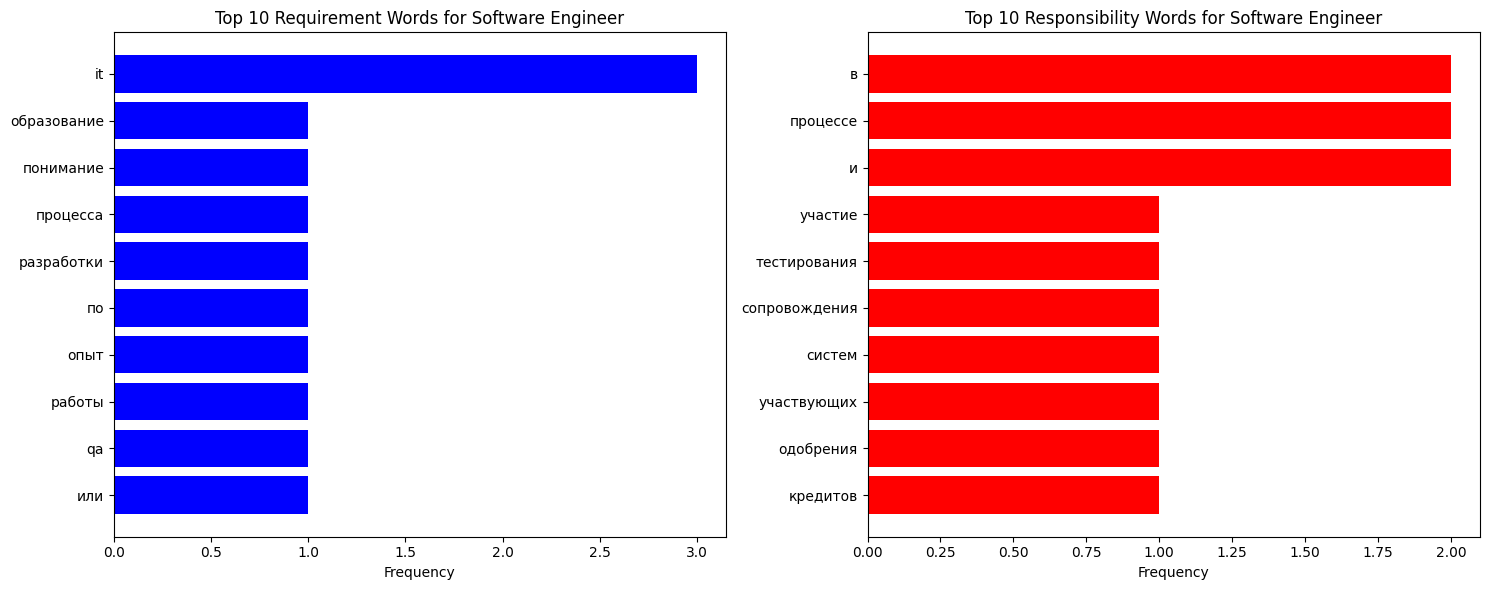

<Figure size 1500x600 with 0 Axes>

In [10]:
def analyze_requirements_responsibilities(data, top_n=5):
    def tokenize_text(text):
        tokens = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
        return tokens

    def tokenize_column(title, column_name):
        filtered_data = data[data['title'] == title][column_name].dropna()
        all_text = " ".join(filtered_data)
        tokens = tokenize_text(all_text)
        return Counter(tokens)

    def plot_most_common(title, column_name, most_common, subplot_position, color):
        if most_common:
            words, counts = zip(*most_common)
            plt.subplot(1, 2, subplot_position)
            plt.barh(words, counts, color=color)
            plt.xlabel('Frequency')
            plt.title(f'Top {top_n} {column_name.capitalize()} Words for {title}')
            plt.gca().invert_yaxis()

    titles_to_analyze = ['Data Scientist', 'Software Engineer', 'Project Manager']

    for title in titles_to_analyze:
        req_tokens = tokenize_column(title, 'requirements')
        resp_tokens = tokenize_column(title, 'responsibilities')

        plt.figure(figsize=(15, 6))

        req_most_common = req_tokens.most_common(top_n)
        plot_most_common(title, 'requirement', req_most_common, 1, 'blue')

        resp_most_common = resp_tokens.most_common(top_n)
        plot_most_common(title, 'responsibility', resp_most_common, 2, 'red')

        plt.tight_layout()
        plt.show()


analyze_requirements_responsibilities(data, top_n=10)